<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2023/24 Semester</h3></th>
    </tr>
</table>

#### Name: Akul Arun
#### Student ID: S10243523

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
%matplotlib inline

*Note: More Packages will be imported along the way

## Step 1: Data Loading

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

## Step 2:  Testing Image Size using Baseline Model

In [3]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

# Function to create and compile the model
def create_model(img_size):
    img_model = models.Sequential()
    img_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
    img_model.add(layers.MaxPooling2D((2, 2)))
    img_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    img_model.add(layers.MaxPooling2D((2, 2)))
    img_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    img_model.add(layers.MaxPooling2D((2, 2)))
    img_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    img_model.add(layers.MaxPooling2D((2, 2)))
    img_model.add(layers.Flatten())
    img_model.add(layers.Dense(512, activation='relu'))
    img_model.add(layers.Dense(10, activation='softmax'))

    img_model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizers.RMSprop(learning_rate=1e-4),
        metrics=['acc']
    )

    return img_model


In [4]:
# Image size values to test
image_sizes = [150, 200, 224, 250, 300] 

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
# Dictionary to store training histories
model_histories = {}

for img_size in image_sizes:
    print(f"Training with image size: {img_size}")

    # Create and compile the model
    img_model = create_model(img_size)

    # Image data generators
    train_datagen = ImageDataGenerator(rescale=1./255)
    validation_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical'
    )

    validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

    # Checkpoint
    mc = ModelCheckpoint(
        f'Image_Model_{img_size}.keras',
        monitor='val_loss',
        mode='min',
        verbose=1,
        save_best_only=True
    )

    # Train the model
    history = img_model.fit(
        train_generator,
        epochs=30,
        validation_data=validation_generator,
        callbacks=[mc],
    )

    # Store training history
    model_histories[img_size] = history

Training with image size: 150
Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
Epoch 1/30
375/375 [==============================] - ETA: 0s - loss: 2.1272 - acc: 0.2259
Epoch 1: val_loss improved from inf to 2.06729, saving model to Image_Model_150.keras
375/375 [==============================] - 30s 71ms/step - loss: 2.1272 - acc: 0.2259 - val_loss: 2.0673 - val_acc: 0.2495
Epoch 2/30
375/375 [==============================] - ETA: 0s - loss: 1.9129 - acc: 0.3316
Epoch 2: val_loss improved from 2.06729 to 1.87643, saving model to Image_Model_150.keras
375/375 [==============================] - 26s 68ms/step - loss: 1.9129 - acc: 0.3316 - val_loss: 1.8764 - val_acc: 0.3390
Epoch 3/30
375/375 [==============================] - ETA: 0s - loss: 1.7897 - acc: 0.3796
Epoch 3: val_loss improved from 1.87643 to 1.80823, saving model to Image_Model_150.keras
375/375 [==============================] - 26s 70ms/step 

In [6]:
# for data_batch, labels_batch in train_generator:
#     print('data batch shape:', data_batch.shape)
#     tmp_plot=data_batch[0]
#     print('labels batch shape:', labels_batch.shape)
#     break

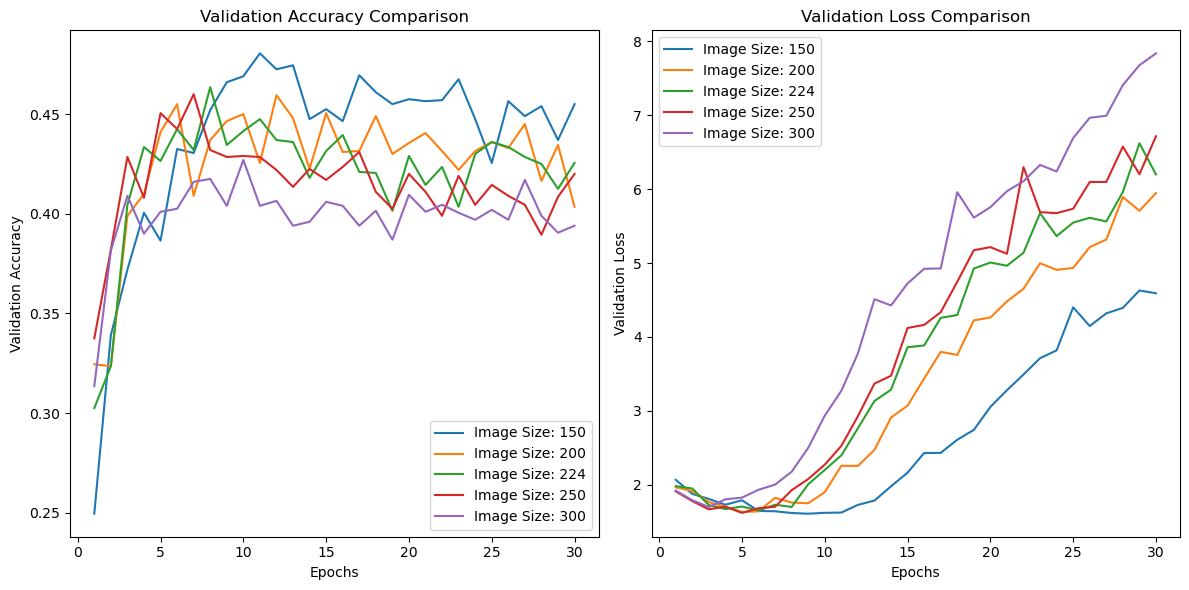

In [7]:
# Plot the Validation Accuracy and Validation Loss
plt.figure(figsize=(12, 6))

# Plot Validation Accuracy
plt.subplot(1, 2, 1)
for img_size in image_sizes:
    history = model_histories[img_size]
    val_acc = history.history['val_acc']
    plt.plot(range(1, len(val_acc) + 1), val_acc, label=f'Image Size: {img_size}')

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

# Plot Validation Loss
plt.subplot(1, 2, 2)
for img_size in image_sizes:
    history = model_histories[img_size]
    val_loss = history.history['val_loss']
    plt.plot(range(1, len(val_loss) + 1), val_loss, label=f'Image Size: {img_size}')

plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()